In [1]:
import platform, sys, os, shutil
import packaging.version as pv
import time

try:
    from google.colab import files
    from google.colab import drive
    drive.mount('/content/drive/')
    print('Google Colab environment detected. Mounted Google Drive.')
except ImportError:
    print('This is not Google Colab.')
    
python_version=platform.python_version()
print('Python version:', python_version)

if pv.parse(python_version) < pv.parse("3.0.0"): 
    print("Python3 is needed!")
    print("How to fix: Runtime/Change_runtime_type/Python 3")
    sys.exit()

try:
    from dolfin import *
    from dolfin import __version__ as dolfin_version
    import mshr
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import __version__ as mpl_version
    import pandas as pd
    from tqdm import tqdm
    import scipy.optimize as opt
    from scipy.stats import norm as sp_norm
    from scipy.integrate import quad
    from scipy.integrate import simpson
    from scipy.signal import find_peaks
    from scipy import __version__ as sp_version
    from scipy.optimize import fsolve
    import mpmath
    import openturns as ot
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from tabulate import tabulate
    import plotly.graph_objs as go
    import plotly.io as pio
    from datetime import datetime
except ImportError as e:
    !wget  "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    from dolfin import *
    from dolfin import __version__ as dolfin_version
    import mshr
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import __version__ as mpl_version
    import pandas as pd
    from tqdm import tqdm
    import scipy.optimize as opt
    from scipy.stats import norm as sp_norm
    from scipy.integrate import quad
    from scipy.integrate import simpson
    from scipy.signal import find_peaks
    from scipy.optimize import fsolve
    from scipy import __version__ as sp_version
    import mpmath
    !pip install openturns
    import openturns as ot
    !pip install scikit-learn
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from tabulate import tabulate
    !pip install plotly
    !pip install kaleido
    import plotly.graph_objs as go
    import plotly.io as pio
    from datetime import datetime

try:
    import gmsh
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh
    
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', labelsize=15) 
plt.rc('lines', linewidth=3)

from IPython.display import clear_output, display

import warnings
warnings.filterwarnings("ignore")

ot.Log.Show(ot.Log.NONE)

set_log_level(30)

parameters['allow_extrapolation'] = True
parameters["form_compiler"]["cpp_optimize"] = True
parameters["form_compiler"]["optimize"] = True
parameters["form_compiler"]["quadrature_degree"] = 3
parameters['form_compiler']['representation'] = 'uflacs'
parameters['linear_algebra_backend'] = "PETSc"

print('numpy version:', np.__version__)
print('scipy version:', sp_version)
print('matplotlib version:', mpl_version)
print('dolfin version:', dolfin_version)
print('gmsh version:', gmsh.__version__)
print('mpmath version:', mpmath.__version__)

try:
    from ILT import *
    from Functions_NMR import *
    from FEM_NMR import *
    from SemiA_Sphere_NMR import *
    from Conv_NMR import *
except ImportError:
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/ILT.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/Functions_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/FEM_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/SemiA_Sphere_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/Conv_NMR.py'
    from ILT import *
    from Functions_NMR import *
    from FEM_NMR import *
    from SemiA_Sphere_NMR import *
    from Conv_NMR import *

print('ILT version:', ilt.__version__)
print('Functions_NMR version:', NMR_Functions.__version__)
print('FEM_NMR version:', NMR_FEM.__version__)
print('SemiA_Sphere_NMR version:', NMR_SemiA_sphere.__version__)
print('Conv_NMR version:', NMR_Conventional.__version__)

This is not Google Colab.
Python version: 3.12.3
numpy version: 1.26.4
scipy version: 1.11.4
matplotlib version: 3.6.3
dolfin version: 2019.2.0.64.dev0
gmsh version: 4.13.1
mpmath version: 1.2.1
ILT version: 1.0
Functions_NMR version: 1.0
FEM_NMR version: 1.3-legacy
SemiA_Sphere_NMR version: 1.3-progress-norm
Conv_NMR version: 1.0


# Testing

M0_FEM = 0.026208176549521293   M0_SA = 0.02620817654952129
M(tf)_FEM = 0.0008545834715329878   M(tf)_SA = 0.0008058150766438471
Error relativo FEM vs SA = 0.011833156955643784


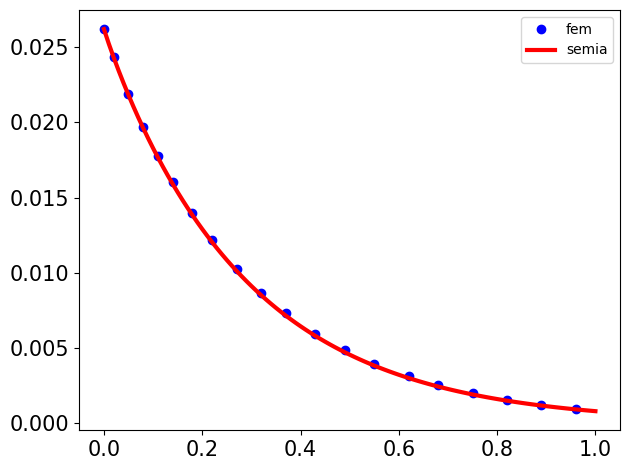

In [15]:
# parámetros idénticos
R = 1.0          # usa el mismo en FEM y SA
D = 1.0
rho = 1.0
T2B = 1.0
B0 = 0.05
T  = 303.15
fluid = "water"
t0, tf, dt = 0.0, 1.0, 1e-2

# FEM: integral espacial
t_fem, _, M_fem, M_assemble_fem = NMR_FEM(radius=R, mesh_res=300,
                                          T2B=T2B, diffusion=D, rho=rho,
                                          B_0=B0, Temp=T, fluid=fluid,
                                          t_0=t0, t_f=tf, dt=dt,
                                          volume_=True, return_data='all',
                                          progress=False)

# SA: integral espacial (misma convención)
t_sa, M_sa, eps, Tn, An, M_assemble_sa = NMR_SemiA_sphere(radius=R,
                                          T2B=T2B, diffusion=D, rho=rho,
                                          B_0=B0, Temp=T, fluid=fluid,
                                          n_terms=120, volume_=True,
                                          t_0=t0, t_f=tf, dt=dt,
                                          progress=False, normalize=True)

print("M0_FEM =", M_fem[0], "  M0_SA =", M_sa[0])
print("M(tf)_FEM =", M_fem[-1], "  M(tf)_SA =", M_sa[-1])

# error relativo (norma L2 en el tiempo)
err_rel = np.linalg.norm(M_fem - M_sa)/np.linalg.norm(M_sa)
print("Error relativo FEM vs SA =", err_rel)

plt.figure()
plt.plot(t_fem, M_fem, color='blue', linestyle='' ,marker='o', markevery=0.05, label='fem')
plt.plot(t_sa, M_sa, color='red', label='semia')
plt.legend()
plt.show()

In [16]:
y_true = M_sa
y_pred = M_fem
metrics = compute_error_metrics(y_true, y_pred,
                                relative="mape",   # error relativo medio en %
                                baseline="true",
                                nrmse="range",
                                table=True)

| Metric               |         Value |
|----------------------|---------------|
| count_used           | 101           |
| MAE                  |   0.000111002 |
| AbsErrorMean         |   0.000111002 |
| MSE                  |   1.38983e-08 |
| RMSE                 |   0.000117891 |
| L1_norm              |   0.0112112   |
| L2_norm              |   0.00118479  |
| Linf_norm            |   0.000162771 |
| RelL2                |   0.0118332   |
| R2                   |   0.999698    |
| MAPE_percent         |   3.00585     |
| RelErrorMean_percent |   3.00585     |
| NRMSE_range          |   0.00464094  |


In [ ]:
# -------- parámetros del problema --------
R_vals = np.linspace(2.25e-6, 50e-6, 10)   # 10 radios
D      = 2.3e-9                            # m^2/s (agua)
rho    = 4.0e-6                             # m/s (cuarzo)
T2B    = 2.0                                # s
B0     = 0.05                               # T
T      = 303.15                             # K
fluid  = "water"
t0, tf, dt = 0.0, 1.0, 1e-2                 # s

# -------- opciones numéricas --------
mesh_res   = 300          # malla FEM (ajústalo si kappa grande)
linear_solver = 'mumps'   # o 'cg'
n_terms_SA = 150          # términos modales para semi-analítica
normalize_SA = True       # renormaliza A_n para garantizar M(0)=V*M0

# -------- contenedores --------
results = {
    "R":         [],
    "t":         None,     # lo fijamos con el primer caso
    "M_FEM":     [],
    "M_SA":      [],
    "metrics":   [],       # dict por radio
    "kappa":     []        # R*rho/D
}

# -------- bucle principal --------
try:
    from tqdm import tqdm
    iterator = tqdm(R_vals, desc="Barrido de radios", unit="R")
except Exception:
    iterator = R_vals

for R in iterator:
    # FEM
    t_fem, _, M_fem, _ = NMR_FEM(radius=R, mesh_res=mesh_res,
                                 T2B=T2B, diffusion=D, rho=rho,
                                 B_0=B0, Temp=T, fluid=fluid,
                                 t_0=t0, t_f=tf, dt=dt,
                                 volume_=True, return_data='all',
                                 linear_solver=linear_solver, progress=False)

    # Semi-analítica (mismo grid temporal)
    t_sa, M_sa, eps, Tn, An, _ = NMR_SemiA_sphere(radius=R,
                                 T2B=T2B, diffusion=D, rho=rho,
                                 B_0=B0, Temp=T, fluid=fluid,
                                 n_terms=n_terms_SA,
                                 t_0=t0, t_f=tf, dt=dt,
                                 volume_=True, progress=False,
                                 normalize=normalize_SA)

    # Asegurar mismo eje temporal (deberían coincidir)
    assert np.allclose(t_fem, t_sa), "Los ejes de tiempo FEM y SA difieren."
    t = t_fem
    if results["t"] is None:
        results["t"] = t

    # Métricas (ponderadas por tiempo real con trapecios)
    metrics = compute_error_metrics(M_sa, M_fem, t=t,
                                    relative="mape", nrmse="range",
                                    table=False)

    # Guardar
    results["R"].append(R)
    results["M_FEM"].append(M_fem)
    results["M_SA"].append(M_sa)
    results["metrics"].append(metrics)
    results["kappa"].append(R * rho / D)

# -------- tabla-resumen --------
# columnas: R(um), kappa, MAE, RMSE, RelL2, MAPE%, R2, NRMSE_range
rows = []
for R, kappa, m in zip(results["R"], results["kappa"], results["metrics"]):
    rows.append([
        R*1e6, kappa,
        m["MAE"], m["RMSE"], m["RelL2"],
        m.get("MAPE_percent", np.nan), m["R2"],
        m.get("NRMSE_range", np.nan)
    ])

headers = ["R (µm)", "kappa=R*rho/D", "MAE", "RMSE", "RelL2",
           "MAPE (%)", "R2", "NRMSE_range"]

try:
    from tabulate import tabulate
    print(tabulate(rows, headers=headers, tablefmt="github",
                   floatfmt=[".3f",".3e",".6e",".6e",".6e",".3f",".6f",".6e"]))
except Exception:
    # fallback simple
    print("\nResumen por radio")
    print(headers)
    for r in rows:
        print(r)

# -------- ejemplo de acceso a resultados --------
# t = results["t"]                # eje temporal (np.ndarray)
# M_fem_R0 = results["M_FEM"][0]  # señal FEM para el primer radio
# M_sa_R0  = results["M_SA"][0]   # señal SA para el primer radio
# met_R0   = results["metrics"][0]

# Quartz : 4 $\mu$m / s

In [11]:
def export_pore_signals_csv(
    R_min=2.25e-6, R_max=100e-6, nR=20,
    D=2.3e-9, rho=4.0e-6, T2B=2.0,
    B0=0.05, Temp=303.15, fluid="water",
    t0=0.0, tf=5.0, dt=1e-3,
    method="both",                 # "FEM", "SA" o "both"
    outfile="signals_by_radius.csv",
    # opciones FEM
    mesh_res=300, linear_solver="mumps",
    # opciones SA
    n_terms_SA=150, normalize_SA=True,
    # otros
    show_progress=True
):
    """
    Genera un CSV con columnas: t[s], m{FEM/SA}_R{idx}_{R[um]}[um], ...
    Cada columna de magnetización es la SEÑAL DEL PORO (volume_=True).
    """
    assert method in ("FEM", "SA", "both")

    # Radios en metros
    R_vals = np.linspace(R_min, R_max, nR)

    # Preparar iterador con tqdm (si existe)
    iterator = R_vals
    if show_progress:
        try:
            from tqdm import tqdm
            iterator = tqdm(R_vals, desc="Simulando radios", unit="R")
        except Exception:
            pass

    data_cols = {}
    t_ref = None

    for i, R in enumerate(iterator, start=1):
        # --- FEM ---
        if method in ("FEM", "both"):
            t_fem, _, M_fem, _ = NMR_FEM(
                radius=R, mesh_res=mesh_res,
                T2B=T2B, diffusion=D, rho=rho,
                B_0=B0, Temp=Temp, fluid=fluid,
                t_0=t0, t_f=tf, dt=dt,
                volume_=True, return_data='all',
                linear_solver=linear_solver, progress=False
            )

        # --- Semi-analítica ---
        if method in ("SA", "both"):
            t_sa, M_sa, *_ = NMR_SemiA_sphere(
                radius=R, T2B=T2B, diffusion=D, rho=rho,
                B_0=B0, Temp=Temp, fluid=fluid,
                n_terms=n_terms_SA,
                t_0=t0, t_f=tf, dt=dt,
                volume_=True, progress=False,
                normalize=normalize_SA
            )

        # Validar eje temporal
        if method == "FEM":
            t_curr = t_fem
        elif method == "SA":
            t_curr = t_sa
        else:
            if not np.allclose(t_fem, t_sa):
                raise ValueError("Los ejes temporales FEM y SA no coinciden.")
            t_curr = t_fem

        # Inicializar columna de tiempo una sola vez
        if t_ref is None:
            t_ref = t_curr.copy()
            data_cols["t[s]"] = t_ref
        else:
            if not np.allclose(t_ref, t_curr):
                raise ValueError("Tiempo inconsistente entre radios.")

        # Construir nombres de columnas (incluye índice y valor en µm)
        R_um = R * 1e6
        tag = f"R{i}_{R_um:0.3f}[um]"

        if method in ("FEM", "both"):
            data_cols[f"mFEM_{tag}"] = M_fem
        if method in ("SA", "both"):
            data_cols[f"mSA_{tag}"] = M_sa

    # Armar DataFrame y exportar
    df = pd.DataFrame(data_cols)
    df.to_csv(outfile, index=False)
    print(f"CSV guardado: {outfile}")
    return df

In [12]:
df = export_pore_signals_csv(
        R_min=2.25e-6, R_max=100e-6, nR=20,
        D=2.3e-9, rho=4.0e-6, T2B=2.0,
        B0=0.05, Temp=303.15, fluid="water",
        t0=0.0, tf=10.0, dt=1e-3,
        method="both",                     # "FEM", "SA" o "both"
        outfile="signals_by_radius.csv",
        mesh_res=300, linear_solver="mumps",
        n_terms_SA=150, normalize_SA=True,
        show_progress=True
    )

Simulando radios: 100%|██████████████████████████| 20/20 [08:01<00:00, 24.09s/R]


CSV guardado: signals_by_radius.csv


In [13]:
df = pd.read_csv("signals_by_radius.csv")

In [14]:
df.keys()

Index(['t[s]', 'mFEM_R1_2.250[um]', 'mSA_R1_2.250[um]', 'mFEM_R2_7.395[um]',
       'mSA_R2_7.395[um]', 'mFEM_R3_12.539[um]', 'mSA_R3_12.539[um]',
       'mFEM_R4_17.684[um]', 'mSA_R4_17.684[um]', 'mFEM_R5_22.829[um]',
       'mSA_R5_22.829[um]', 'mFEM_R6_27.974[um]', 'mSA_R6_27.974[um]',
       'mFEM_R7_33.118[um]', 'mSA_R7_33.118[um]', 'mFEM_R8_38.263[um]',
       'mSA_R8_38.263[um]', 'mFEM_R9_43.408[um]', 'mSA_R9_43.408[um]',
       'mFEM_R10_48.553[um]', 'mSA_R10_48.553[um]', 'mFEM_R11_53.697[um]',
       'mSA_R11_53.697[um]', 'mFEM_R12_58.842[um]', 'mSA_R12_58.842[um]',
       'mFEM_R13_63.987[um]', 'mSA_R13_63.987[um]', 'mFEM_R14_69.132[um]',
       'mSA_R14_69.132[um]', 'mFEM_R15_74.276[um]', 'mSA_R15_74.276[um]',
       'mFEM_R16_79.421[um]', 'mSA_R16_79.421[um]', 'mFEM_R17_84.566[um]',
       'mSA_R17_84.566[um]', 'mFEM_R18_89.711[um]', 'mSA_R18_89.711[um]',
       'mFEM_R19_94.855[um]', 'mSA_R19_94.855[um]', 'mFEM_R20_100.000[um]',
       'mSA_R20_100.000[um]'],
      dtype='

In [15]:
import re

In [16]:
def _detect_time_col(df: pd.DataFrame, time_col_hint: str = "t[s]") -> str:
    if time_col_hint in df.columns:
        return time_col_hint
    # fallback: primera columna numérica con nombre que contenga 't'
    for c in df.columns:
        if 't' in c.lower() and np.issubdtype(df[c].dtype, np.number):
            return c
    # última opción: primera columna numérica
    for c in df.columns:
        if np.issubdtype(df[c].dtype, np.number):
            return c
    raise ValueError("No pude detectar columna de tiempo en el DataFrame.")

def _parse_signal_columns(df: pd.DataFrame):
    """
    Devuelve:
      fem_cols: dict[tag] = nombre_columna_FEM
      sa_cols : dict[tag] = nombre_columna_SA
      tag_order: lista de tags en orden encontrado (para leyendas ordenadas)
    Donde 'tag' es la parte 'R{i}_{R_um}[um]' del nombre.
    """
    fem_cols, sa_cols, tag_order = {}, {}, []

    fem_pat = re.compile(r"^mFEM_(R\d+_.*?\[um\])$")
    sa_pat  = re.compile(r"^mSA_(R\d+_.*?\[um\])$")

    for col in df.columns:
        m_f = fem_pat.match(col)
        m_s = sa_pat.match(col)
        if m_f:
            tag = m_f.group(1)
            fem_cols[tag] = col
            if tag not in tag_order:
                tag_order.append(tag)
        elif m_s:
            tag = m_s.group(1)
            sa_cols[tag]  = col
            if tag not in tag_order:
                tag_order.append(tag)

    if not fem_cols and not sa_cols:
        raise ValueError("No encontré columnas tipo 'mFEM_*' ni 'mSA_*' en el DataFrame.")
    return fem_cols, sa_cols, tag_order

def plot_pore_signals_from_df(
    df: pd.DataFrame,
    *,
    time_col: str | None = None,
    yscale: str = "linear",           # "linear" o "log"
    linewidth: float = 1.4,
    alpha: float = 1.0,
    legend_cols: int = 2,
    figsize = (8, 5),
    title_prefix: str = "",
    save_figs: bool = False,
    out_prefix: str = "poros_"
):
    """
    Genera tres figuras a partir del DataFrame:
      1) t vs FEM (todas las columnas mFEM_*)
      2) t vs SA  (todas las columnas mSA_*)
      3) t vs FEM y SA (pares por poro, mismo color: FEM -, SA --)
    """
    # --- detectar tiempo y columnas
    tcol = time_col or _detect_time_col(df)
    t = np.asarray(df[tcol].values, dtype=float)

    fem_cols, sa_cols, tag_order = _parse_signal_columns(df)

    # Paleta cíclica de matplotlib; hacemos un mapa tag->color para reutilizar en la fig 3
    prop_cycle = plt.rcParams['axes.prop_cycle'].by_key().get('color', None)
    if prop_cycle is None or len(prop_cycle) == 0:
        prop_cycle = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
    color_map = {tag: prop_cycle[i % len(prop_cycle)] for i, tag in enumerate(tag_order)}

    ylabel = "Señal M(t) [a.u.]"  # el CSV que exportaste usa volume_=True (señal del poro)

    # 1) FEM
    if fem_cols:
        plt.figure(figsize=figsize)
        for tag in tag_order:
            if tag in fem_cols:
                y = np.asarray(df[fem_cols[tag]].values, dtype=float)
                plt.plot(t, y, label=tag.replace('_', ' = '), linewidth=linewidth,
                         alpha=alpha, color=color_map[tag])
        plt.xlabel("t [s]")
        plt.ylabel(ylabel)
        ttl = (title_prefix + "Solución numérica (FEM) por poro").strip()
        plt.title(ttl)
        plt.grid(True)
        plt.yscale(yscale)
        plt.legend(ncol=legend_cols, fontsize=9)
        plt.tight_layout()
        if save_figs:
            plt.savefig(f"{out_prefix}FEM.png", dpi=200)
        plt.show()

    # 2) SA
    if sa_cols:
        plt.figure(figsize=figsize)
        for tag in tag_order:
            if tag in sa_cols:
                y = np.asarray(df[sa_cols[tag]].values, dtype=float)
                plt.plot(t, y, label=tag.replace('_', ' = '), linewidth=linewidth,
                         alpha=alpha, color=color_map[tag])
        plt.xlabel("t [s]")
        plt.ylabel(ylabel)
        ttl = (title_prefix + "Solución semi-analítica por poro").strip()
        plt.title(ttl)
        plt.grid(True)
        plt.yscale(yscale)
        plt.legend(ncol=legend_cols, fontsize=9)
        plt.tight_layout()
        if save_figs:
            plt.savefig(f"{out_prefix}SemiA.png", dpi=200)
        plt.show()

    # 3) Comparación FEM vs SA (mismo color por tag; FEM -, SA --)
    if fem_cols or sa_cols:
        plt.figure(figsize=figsize)
        for tag in tag_order:
            # FEM sólido
            if tag in fem_cols:
                yF = np.asarray(df[fem_cols[tag]].values, dtype=float)
                plt.plot(t, yF, label=f"FEM {tag}".replace('_',' = '),
                         linewidth=linewidth, alpha=alpha, color=color_map[tag],
                        linestyle='', marker='o', markevery=0.05)
            # SA punteado
            if tag in sa_cols:
                yS = np.asarray(df[sa_cols[tag]].values, dtype=float)
                plt.plot(t, yS, linestyle="solid",
                         label=f"SA  {tag}".replace('_',' = '),
                         linewidth=linewidth, alpha=alpha, color=color_map[tag])
        plt.xlabel("t [s]")
        plt.ylabel(ylabel)
        ttl = (title_prefix + "Comparación FEM vs Semi-analítica").strip()
        plt.title(ttl)
        plt.grid(True)
        plt.yscale(yscale)
        plt.legend(ncol=legend_cols, fontsize=8)
        plt.tight_layout()
        if save_figs:
            plt.savefig(f"{out_prefix}FEM_vs_SemiA.png", dpi=200)
        plt.show()

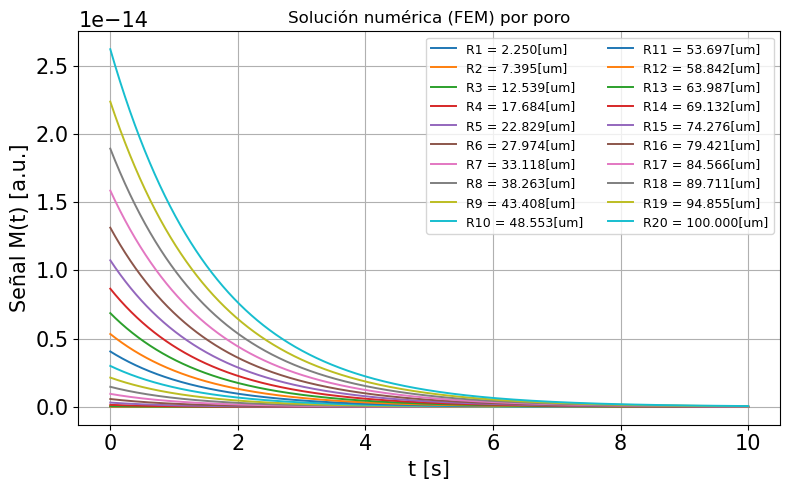

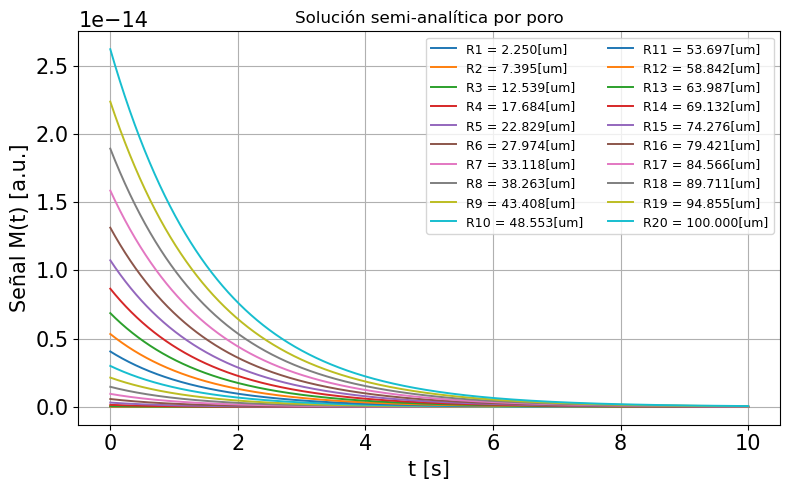

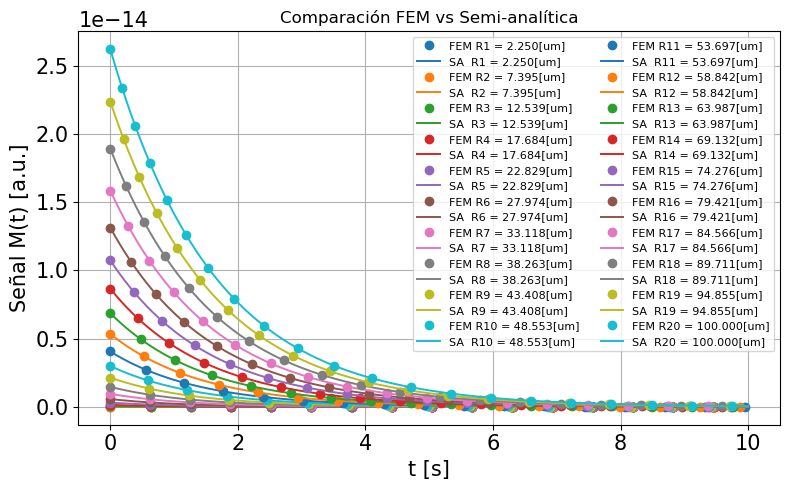

In [17]:
plot_pore_signals_from_df(
    df,
    yscale="linear",        # o "log" si quieres ver varias décadas
    legend_cols=2,
    save_figs=False,        # True para guardar PNGs
    out_prefix="poros_"     # prefijo de archivo si guardas
)